In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# installing keras in google colab
!pip install -q keras

In [0]:
#importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import seed
seed(108)

import pandas as pd
from random import random
from PIL import Image
from skimage.io import imread, imshow
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline
import os
import os.path
import shutil
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split

from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
# Imports for diverse utilities
from shutil import copyfile
import matplotlib.pyplot as plt
import operator
from PIL import Image
from sys import intern   # For the symbol definitions

Using TensorFlow backend.


Loading Data


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sravanibl","key":"6bed09551fdfa10891aff7c3d430bf33"}'}

In [0]:
!mkdir .kaggle
!mv kaggle.json .kaggle
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

mkdir: cannot create directory ‘.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
- path is now set to: {/content}


In [0]:
!mkdir data
!kaggle datasets download kmader/skin-cancer-mnist-ham10000 -p data

mkdir: cannot create directory ‘data’: File exists
100% 5.19G/5.20G [01:48<00:00, 39.2MB/s]
100% 5.20G/5.20G [01:48<00:00, 51.3MB/s]


In [0]:
# Unzip the whole zipfile into /content/data
!unzip -o data/skin-cancer-mnist-ham10000.zip -d data


Streaming output truncated to the last 5000 lines.
  inflating: data/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: data/ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: data/ham10000_images_part_2/ISIC_002

In [0]:

source1 = '/content/data/HAM10000_images_part_1/'
dest = '/content/data'

files = os.listdir(source1)

for f in files:
  shutil.move(source1+f, dest)

In [0]:
source2 = '/content/data/HAM10000_images_part_2/'
dest = '/content/data'

files = os.listdir(source2)

for f in files:
  shutil.move(source2+f, dest)

In [0]:
!echo files in /content/data: `ls data | wc -l`

files in /content/data: 10025


In [0]:
bs = 64        
size = 224      
path = Path("/content/data")   

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_rotate=None, max_warp=None, max_zoom=1.0)

In [0]:

data = ImageDataBunch.from_csv('data', csv_labels='HAM10000_metadata.csv', suffix='.jpg', fn_col=1, label_col=2, 
                               ds_tfms=tfms, valid_pct = 0.2,size=128, bs=bs).normalize(imagenet_stats)



In [0]:
print('Transforms = ', len(tfms))

Transforms =  2


In [0]:
# Save the DataBunch

data.save('imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')

# Show the statistics of the Bunch...
print(data.classes)
data

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


ImageDataBunch;

Train: LabelList (8012 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
bkl,bkl,bkl,bkl,bkl
Path: data;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
nv,mel,nv,nv,mel
Path: data;

Test: None

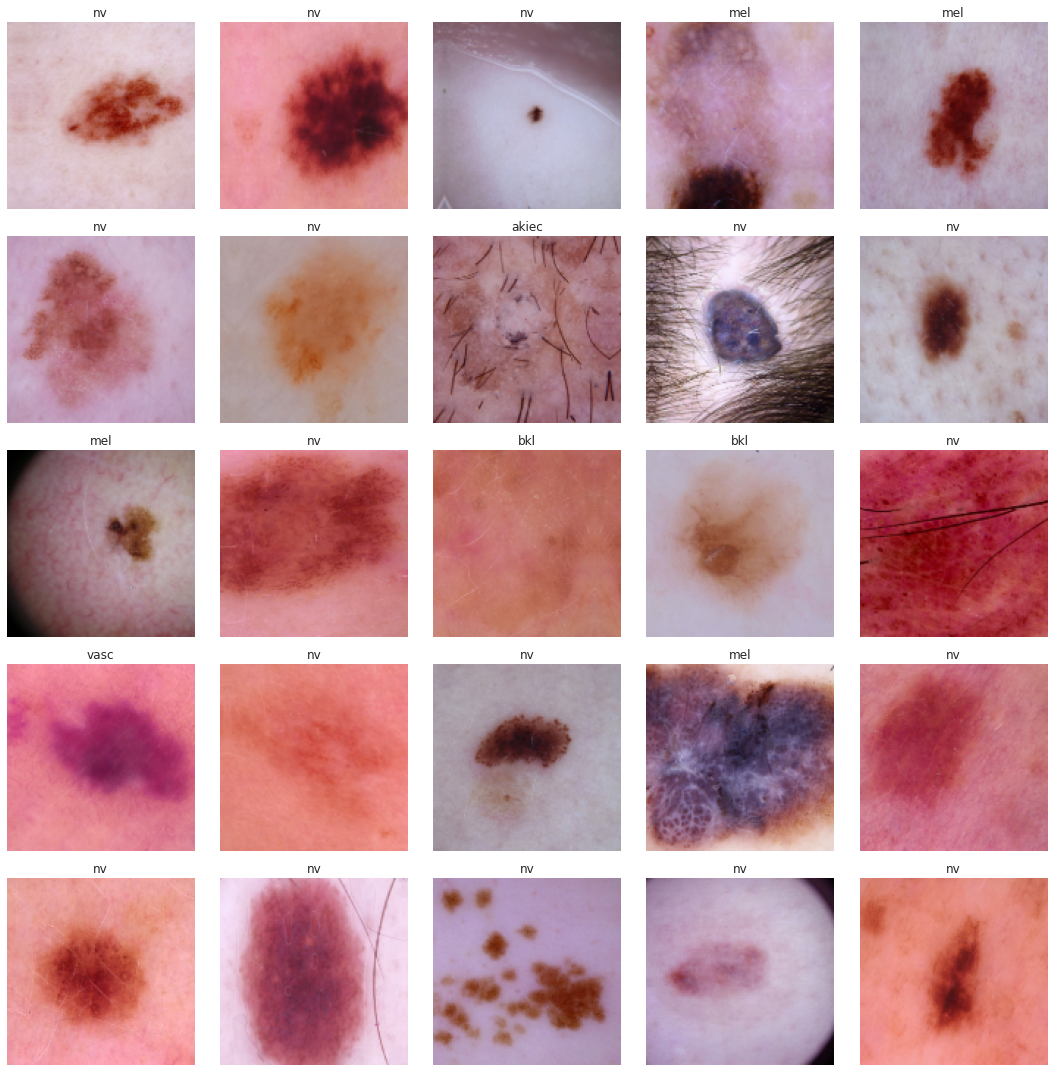

In [0]:
data.show_batch(rows=5, figsize=(15,15))

In [0]:
## Utilizing RestNet34



#learn = cnn_learner(data, 
#                    models.resnet34, 
#                   metrics=[accuracy, error_rate,fbeta])


architecture = models.resnet34

learn = cnn_learner(data, architecture,metrics=[error_rate])

### f_scrore didn't work??

###### Try also using the 'Dice' metric and fbeta #########

learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
!/opt/bin/nvidia-smi
!nvcc --version

Sun Apr 12 22:02:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    36W / 250W |   3145MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


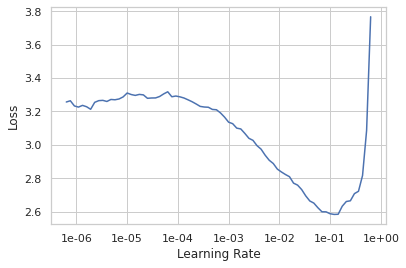

In [0]:
learn.lr_find();
learn.recorder.plot();

In [0]:
## Using fit_one_cycle approach instead of fit, 

#learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='derma-1')])

#learn.save('derma-stage-1')

#exportStageTo(learn, path)

lr = 1e-01

learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.992224,0.857981,0.289066,02:17
1,0.874892,0.755078,0.259611,02:16
2,0.765771,0.770025,0.255117,02:17
3,0.852306,0.840798,0.233650,02:16
4,1.046184,0.835004,0.320020,02:16
5,1.273577,1.157480,0.315527,02:16
6,0.927914,11.284005,0.304044,02:17
7,1.062317,0.991560,0.275087,02:16
8,0.940589,1.016509,0.274089,02:16
9,0.875980,1.015895,0.272092,02:17


Accuracy is 83%

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [0]:
#interp = ClassificationInterpretation.from_learner(learn)
#losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)

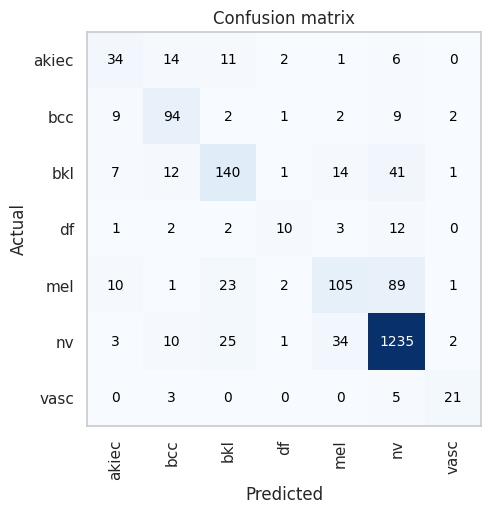

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [0]:
y_pred = np.argmax(preds, axis=1)
y_true = y

In [0]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=data.classes)

print(report)

              precision    recall  f1-score   support

       akiec       0.53      0.50      0.52        68
         bcc       0.69      0.79      0.74       119
         bkl       0.69      0.65      0.67       216
          df       0.59      0.33      0.43        30
         mel       0.66      0.45      0.54       231
          nv       0.88      0.94      0.91      1310
        vasc       0.78      0.72      0.75        29

    accuracy                           0.82      2003
   macro avg       0.69      0.63      0.65      2003
weighted avg       0.81      0.82      0.81      2003



In [0]:
### ResNet 50

In [0]:
bs_50 = 64
size = 224
path = Path("/content/data") 
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_rotate=None, max_warp=None, max_zoom=1.0)

data_50 = ImageDataBunch.from_csv('data', csv_labels='HAM10000_metadata.csv', suffix='.jpg', fn_col=1, label_col=2, 
                               ds_tfms=tfms, valid_pct = 0.2,size=128, bs=bs_50).normalize(imagenet_stats)

# Save the DataBunch

data_50.save('imageDataBunch-bs-'+str(bs)+'-size-'+str(size)+'.pkl')

# Show the statistics of the Bunch...
print(data_50.classes)
data


['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


ImageDataBunch;

Train: LabelList (8012 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bkl,bkl,bkl,bkl,bkl
Path: data;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nv,nv,nv,bkl,nv
Path: data;

Test: None

In [0]:
learn50 = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])
learn50.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [0]:
learn50.fit_one_cycle(15, callbacks=[SaveModelCallback(learn50, every='epoch', monitor='accuracy', name='derma50-1')])
# Save weights
learn50.save('derma50-stage-1')
# Deploy the whole network (with the databunch)
#exportStageTo(learn50, path)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.654688,1.100418,0.700449,0.299551,04:01
1,1.002655,0.753951,0.755367,0.244633,04:00
2,0.804412,0.633507,0.766850,0.233150,03:59
3,0.651364,0.585800,0.798303,0.201697,03:59
4,0.618550,0.550862,0.803794,0.196206,03:59
5,0.580049,0.490705,0.812282,0.187718,03:59
6,0.501383,0.472328,0.820769,0.179231,04:00
7,0.455746,0.430337,0.842237,0.157763,04:02
8,0.436846,0.433065,0.845731,0.154269,04:00
9,0.422262,0.400090,0.851223,0.148777,04:00


NameError: ignored

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


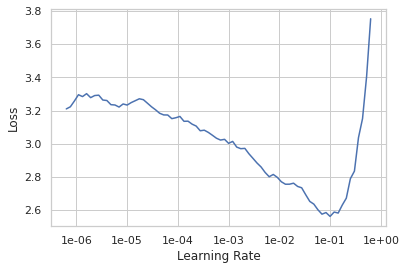

In [0]:
learn50.lr_find();
learn50.recorder.plot();

In [0]:
preds_50,y,losses = learn50.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn50, preds_50, y, losses)

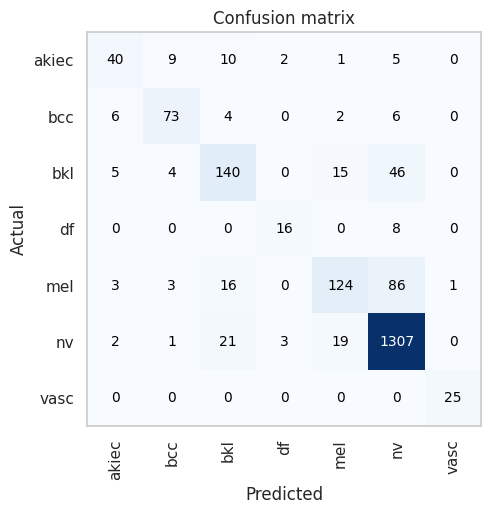

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [0]:
y_pred_50 = np.argmax(preds_50, axis=1)
y_true = y

In [0]:
# Generate a classification report
report = classification_report(y_true, y_pred_50, target_names=data.classes)

print(report)

              precision    recall  f1-score   support

       akiec       0.71      0.60      0.65        67
         bcc       0.81      0.80      0.81        91
         bkl       0.73      0.67      0.70       210
          df       0.76      0.67      0.71        24
         mel       0.77      0.53      0.63       233
          nv       0.90      0.97      0.93      1353
        vasc       0.96      1.00      0.98        25

    accuracy                           0.86      2003
   macro avg       0.81      0.75      0.77      2003
weighted avg       0.85      0.86      0.85      2003



Learning Curve

Fine Tune the model, by changing the input size to double (448)

change the learning rate? 

Change the evaluation metrics? dice and f score

Adjusting Class Weights??

Use ResNet50?

Categorical_cross_entropy?

ROC Curve
